https://www.freecodecamp.org/news/how-to-build-and-train-k-nearest-neighbors-ml-models-in-python/

In [20]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix


In [4]:
raw_data = pd.read_csv('classified_data.csv', index_col = 0)


In [6]:
raw_data.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [7]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(raw_data.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_features = scaler.transform(raw_data.drop('TARGET CLASS', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis=1).columns)


In [14]:
x = scaled_data

y = raw_data['TARGET CLASS']

In [15]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)


Next, let’s create an instance of the KNeighborsClassifier class and assign it to a variable named model

This class requires a parameter named n_neighbors, which is equal to the K value of the K nearest neighbors algorithm that you’re building. To start, let’s specify n_neighbors = 1:

In [31]:
model = KNeighborsClassifier(n_neighbors = 40)


In [32]:
model.fit(x_training_data, y_training_data)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [33]:
predictions = model.predict(x_test_data)

In [34]:

print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       147
           1       0.94      0.97      0.95       153

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [35]:
print(confusion_matrix(y_test_data, predictions))

[[137  10]
 [  5 148]]


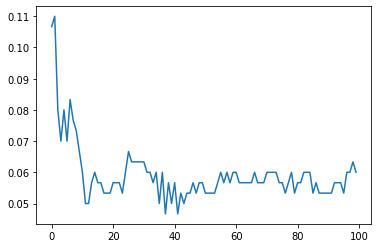

In [36]:
error_rates = []
for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(x_training_data, y_training_data)

    new_predictions = new_model.predict(x_test_data)

    error_rates.append(np.mean(new_predictions != y_test_data))
plt.plot(error_rates)

Here is a brief summary of what you learned about K-nearest neighbors models in Python:

How classified data is a common tool used to teach students how to solve their first K nearest neighbor problems
Why it’s important to standardize your data set when building K nearest neighbor models
How to split your data set into training data and test data using the train_test_split function
How to train your first K nearest neighbors model and make predictions with it
How to measure the performance of a K nearest neighbors model
How to use the elbow method to select an optimal value of K in a K nearest neighbors model